In [1]:
# either run this or run the requirements.txt

# !pip install tensorflow[and-cuda] opencv-python matplotlib opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 56.5 MB/s eta 0:00:00
  Preparing metadata (

In [2]:
# going to the root dir and getting rid of the warnings

import os
import warnings

os.chdir("../")
print(f"currenct dir - {os.getcwd()}")

warnings.filterwarnings("ignore")

currenct dir - /content


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# is there any gpu ????

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# getting into the images

import cv2
import os

In [7]:
data_dir = "data"
image_exts = ['.jpeg','.jpg', '.bmp', '.png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            _, extension = os.path.splitext(image_path)
            if extension not in image_exts:
                print(f"image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")


In [9]:
# loading the data

import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

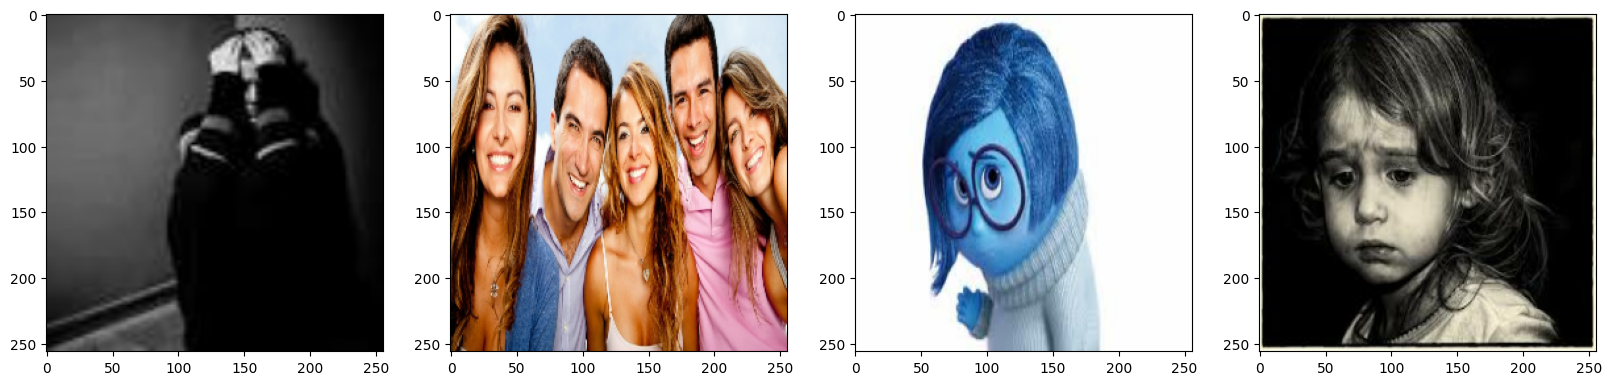

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

In [13]:
# scaling the data

data = data.map(lambda x, y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         ...,
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862

In [15]:
# split the data

train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
# building the model
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
# getting some dangerous peopel from tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [20]:
model = Sequential()

# adding the conv layers
model.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    strides=1,
    activation="relu",
    input_shape=(256, 256, 3),
))
model.add(MaxPooling2D())
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=1,
    activation="relu",
))
model.add(MaxPooling2D())
model.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    strides=1,
    activation="relu",
))
model.add(MaxPooling2D())

# flattening
model.add(Flatten())

# an fnn layer
model.add(Dense(
    units=256,
    activation="relu",
))

# the output layer
model.add(Dense(
    units=1,
    activation="sigmoid",
))

In [21]:
# lemme see the model as a whole

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
# compiling the model

model.compile(
    optimizer="adam",
    loss=tf.losses.BinaryCrossentropy(),
    metrics=["accuracy",]
)

In [23]:
# setting the tensorboard

logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
# training

hist = model.fit(
    train,
    epochs=20,
    validation_data=val,
    callbacks=[tensorboard_callback],
)

Epoch 1/20
7/7 [==============================] - 8s 534ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 8.1406e-04 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 8s 908ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 2.3111e-04 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 6s 498ms/step - loss: 0.0084 - accuracy: 0.9955 - val_loss: 5.0668e-04 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 9s 913ms/step - loss: 0.0075 - accuracy: 0.9911 - val_loss: 0.0117 - val_accuracy: 0.9844
Epoch 5/20
7/7 [==============================] - 8s 910ms/step - loss: 0.0042 - accuracy: 0.9955 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 6s 502ms/step - loss: 0.0093 - accuracy: 0.9955 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 7s 660ms/step - loss: 0.0094 - accuracy: 0.9955 - val_loss: 2.2922e-04 - val_accuracy: 1.0000
Epoc

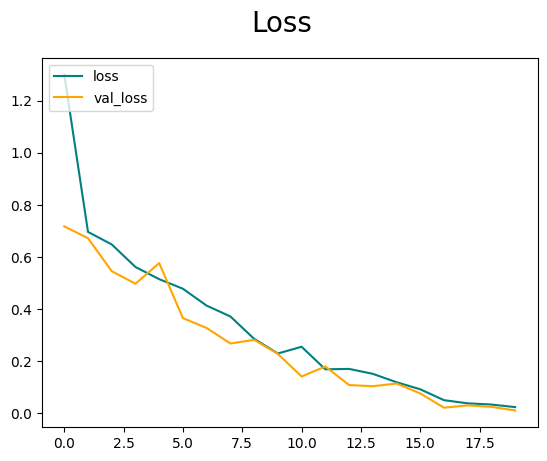

In [25]:
# plotting the loss while training

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

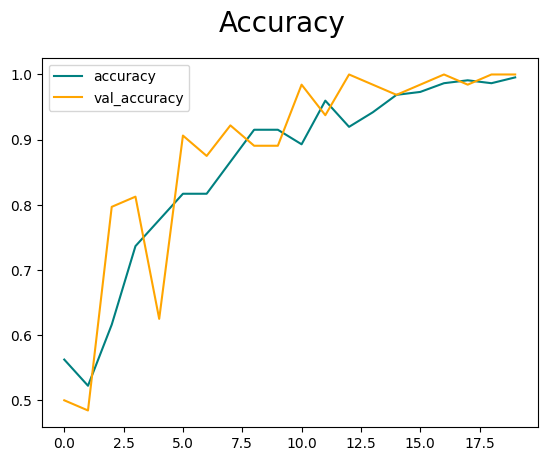

In [26]:
# plotting how we got this accuracy

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
# evaluating

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 529ms/step


In [28]:
# showing the metrics

print(
    f"precision - {pre.result()}",
    f"recall - {re.result()}",
    f"accuracy - {acc.result()}",
    sep="\n")

precision - 1.0
recall - 1.0
accuracy - 1.0


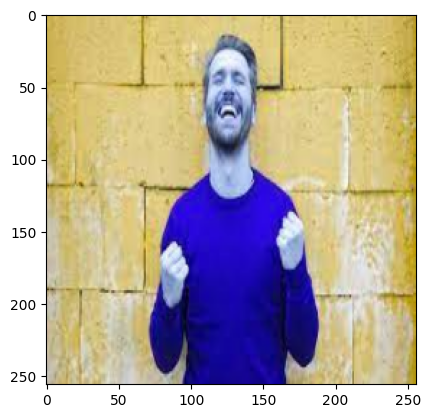

In [33]:
# testing with new images

import cv2

img = cv2.imread('hh.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int), cv2.)
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 239ms/step


array([[0.01548017]], dtype=float32)

In [35]:
# what a cocunut is this prediction ?? tell me whether it is happy or sad

if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [41]:
# finally, saving the model

model.save(os.path.join('models','imageclassifier.h5'))

In [38]:
# waitttt, is the saved one work just like this ?????

from tensorflow.keras.models import load_model
new_model = load_model('models/imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 230ms/step


array([[0.01548017]], dtype=float32)

Haha, it is working just fine :)

**Thanks a lot buddy**